## PROJECT: NBA SHOT SELECTION

# IMPORTING THE NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# BUSINESS CASE:-Our objective is to build a shot prediction model, whether the player will score or not score.

# LOADING THE DATASET

In [3]:
data=pd.read_csv("data.csv")

In [4]:
data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696


In [5]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

# DOMAIN ANALYSIS
ACTION TYPE - There are several different types of shot that player can take.

COMBINED SHOT TYPE - Combination of two shots.

GAME EVENT ID - It will be used to get the game event data.

GAME ID - It is a unique sequence used to identify your player profile in free to play games.

LAT AND LONG - Lat and Long will give co-ordinates to the place where game happened.

LOC_X - X is left-right along the endline with 0 centered at the basket (negative numbers left of the basket if the basket is on the bottom of the chart).

LOC_Y - Y is positive towards halfcourt with 0 being at the basket (so very small negative numbers are possible, since the basket hangs just over the baseline).

MINUTES REMAINING - Minutes left in a given overall time.

PERIOD - A period in basketball is a block of time that a basketball game is made up of.There are four periods in an NBA game that last 12 minutes each.

PLAYOFFS - An additional match played to decide the outcome of a contest.

SEASON - In sports, a season is the part of one year that games of that sport are played.

SECONDS REMAINING - Seconds left in that minute.

SHOT DISTANCE - The shot is from the distance of an NBA three pointer (23 ft. 9 in.) Measures a team's point differential per 100 possessions.

SHOT MADE FLAG - Whether the player took a shot or not.

SHOT TYPE - In basketball, a field goal is a basket scored on any shot or tap other than a free throw, worth two or three points depending on the distance of the attempt from the basket.

SHOT ZONE AREA - The area of the field where player is able to take the shot at goal.

SHOT ZONE BASIC - With the use of only one hand, the shot should be released above the height of shoulder.

SHOT ZONE RANGE - Areas where they are most comfortable and confident in making shots.

TEAM ID - A TeamID is a unique identifier.

TEAM NAME - It is the name of a team in which player played for in a particular season.

GAME DATE - Date on which game happened.

MATCHUP - A sporting contest between two teams.

OPPONENT - Team that is competing against another team in a game.

SHOT ID - It is a unique id given to a particular shot.

# BASIC CHECKS

In [6]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [7]:
data.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [9]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [10]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

#### shot_made_flag is having 5000 missing values.

# EXPLORATORY DATA ANALYSIS 

###  UNIVARIATE ANALYSIS

In [11]:
integer_columns = data.select_dtypes(include=['int64','float64'])
integer_columns

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
0,10,20000012,33.9723,167,72,-118.1028,10,1,0,27,18,NaN,1610612747,1
1,12,20000012,34.0443,-157,0,-118.4268,10,1,0,22,15,0.0,1610612747,2
2,35,20000012,33.9093,-101,135,-118.3708,7,1,0,45,16,1.0,1610612747,3
3,43,20000012,33.8693,138,175,-118.1318,6,1,0,52,22,0.0,1610612747,4
4,155,20000012,34.0443,0,0,-118.2698,6,2,0,19,0,1.0,1610612747,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30692,397,49900088,33.9963,1,48,-118.2688,6,4,1,5,4,0.0,1610612747,30693
30693,398,49900088,34.0443,0,0,-118.2698,6,4,1,5,0,NaN,1610612747,30694
30694,426,49900088,33.8783,-134,166,-118.4038,3,4,1,28,21,1.0,1610612747,30695
30695,448,49900088,33.7773,31,267,-118.2388,2,4,1,10,26,0.0,1610612747,30696


In [12]:
numerical_cols=integer_columns.drop(['game_event_id','game_id','shot_made_flag','team_id','shot_id'],axis=1)

In [13]:
numerical_cols

,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance
0,33.9723,167,72,-118.1028,10,1,0,27,18
1,34.0443,-157,0,-118.4268,10,1,0,22,15
2,33.9093,-101,135,-118.3708,7,1,0,45,16
3,33.8693,138,175,-118.1318,6,1,0,52,22
4,34.0443,0,0,-118.2698,6,2,0,19,0
...,...,...,...,...,...,...,...,...,...
30692,33.9963,1,48,-118.2688,6,4,1,5,4
30693,34.0443,0,0,-118.2698,6,4,1,5,0
30694,33.8783,-134,166,-118.4038,3,4,1,28,21
30695,33.7773,31,267,-118.2388,2,4,1,10,26


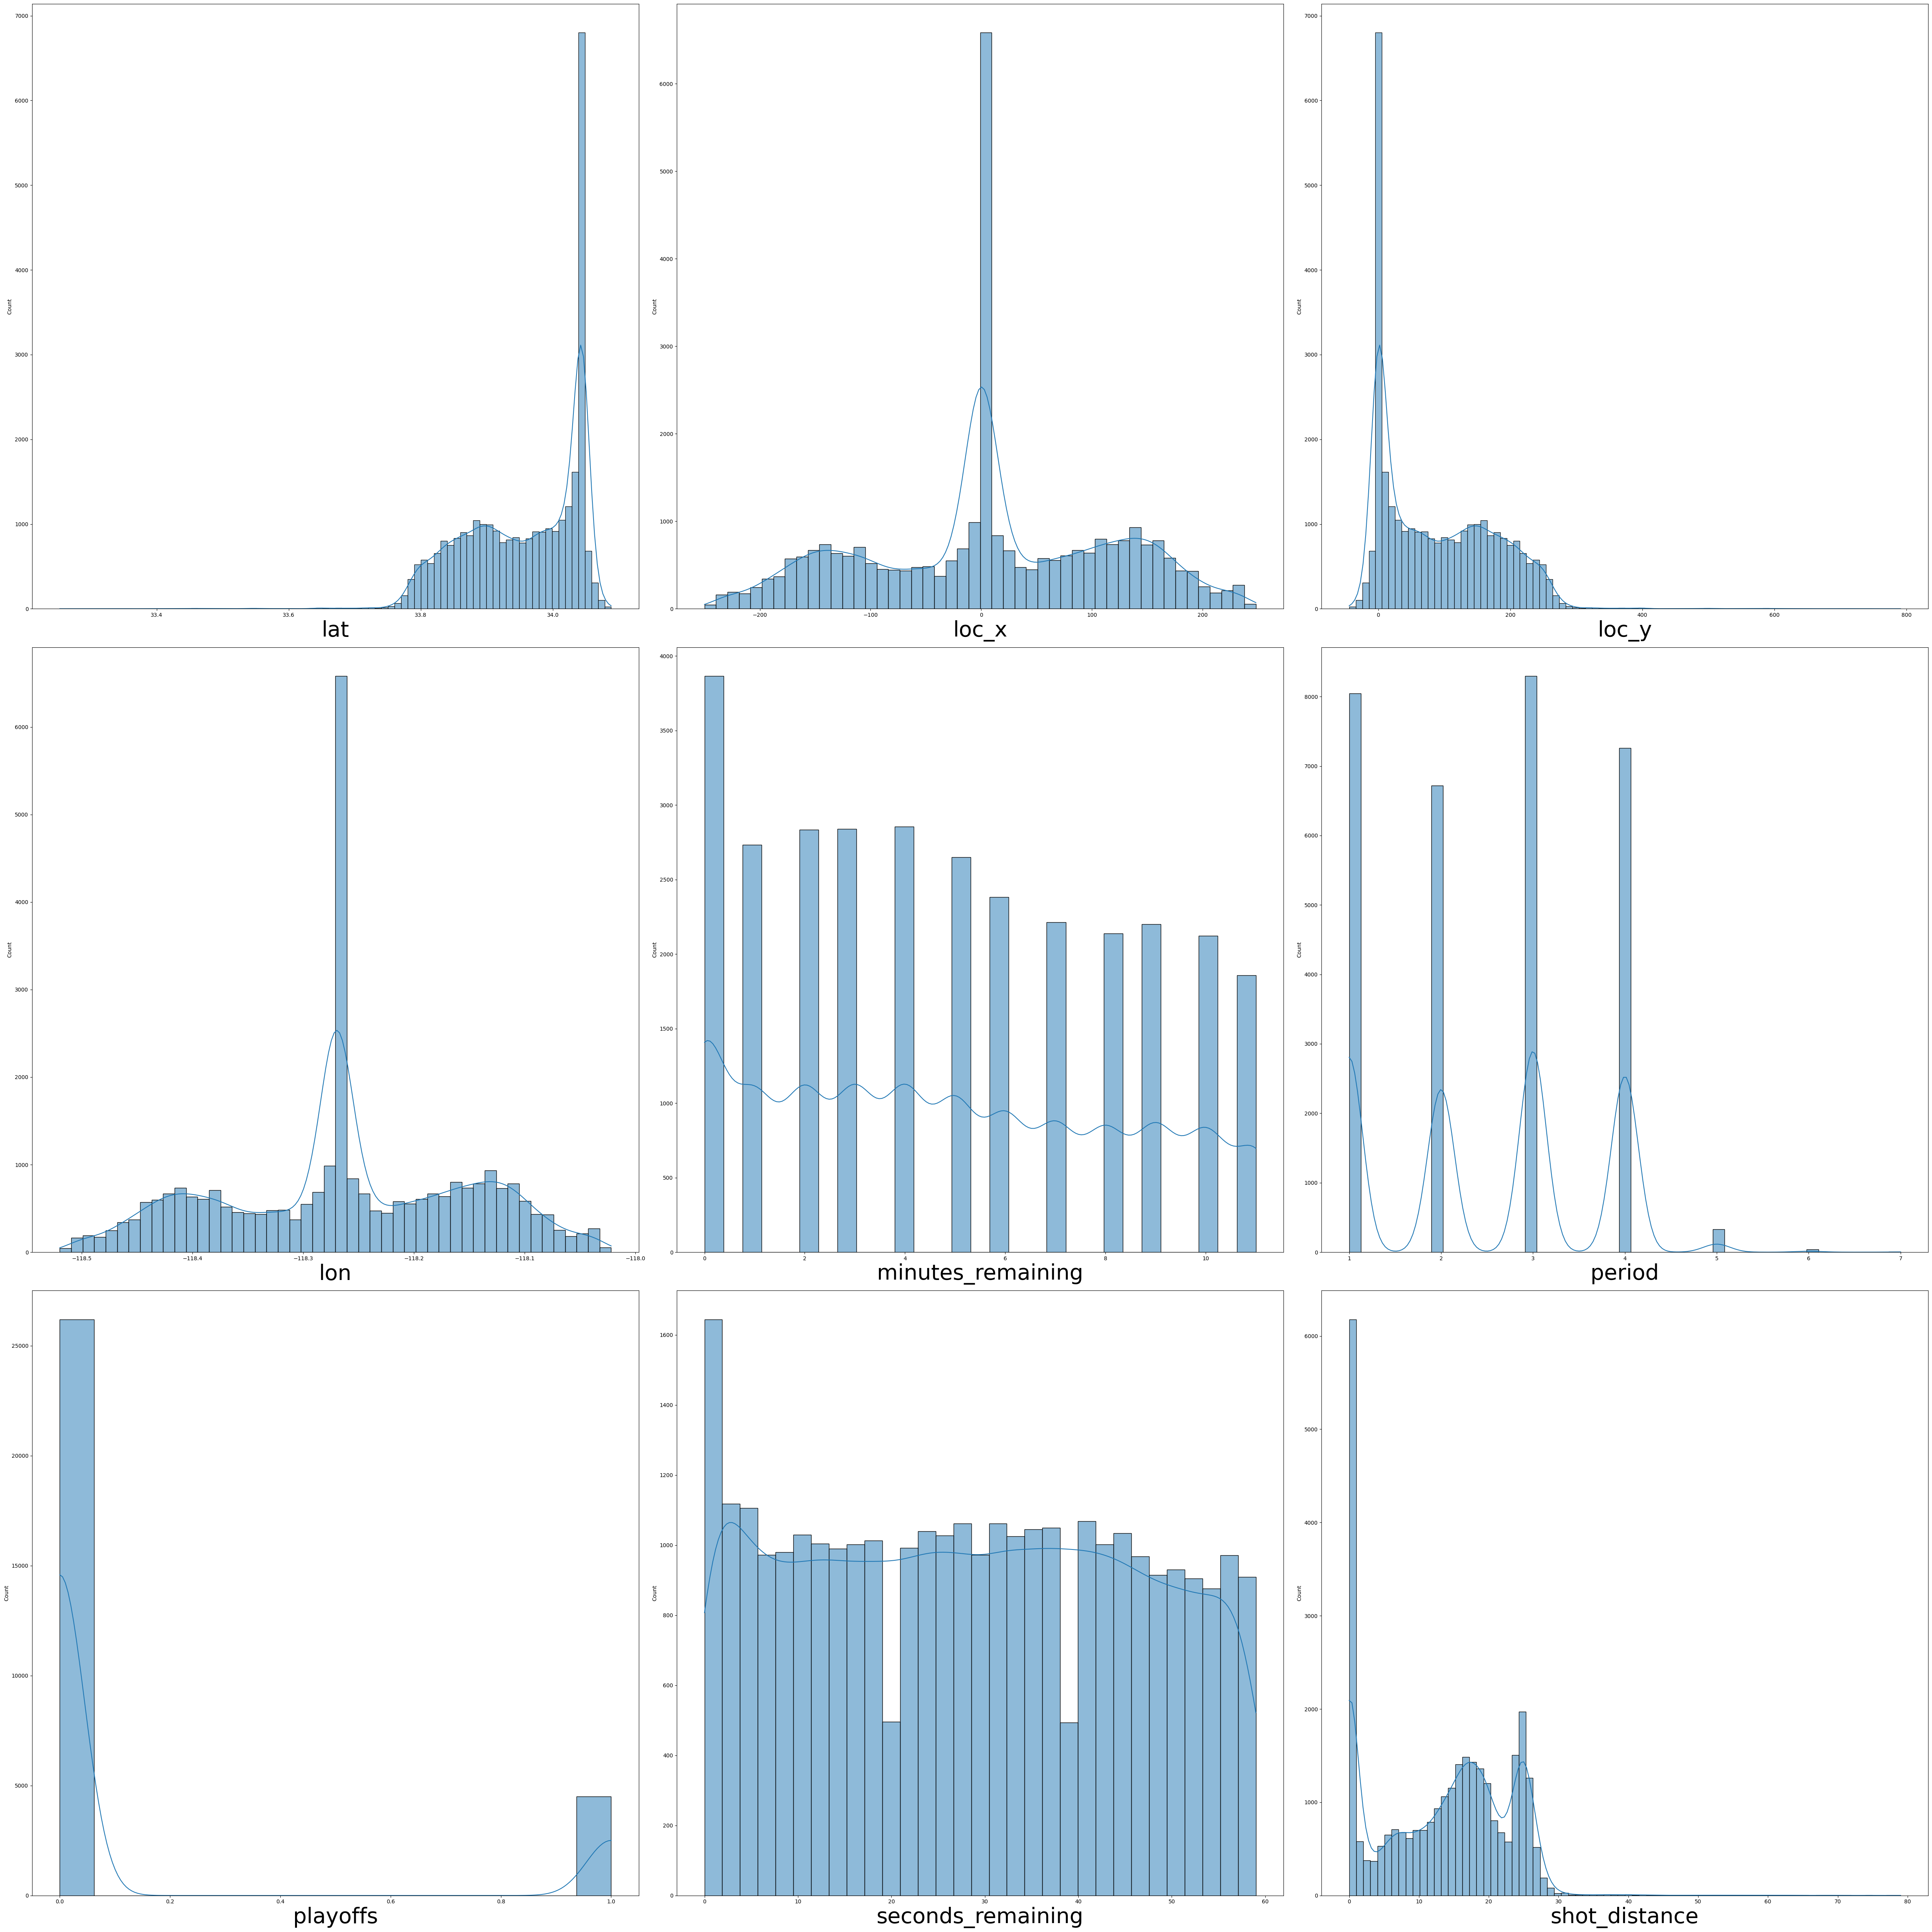

In [14]:
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in numerical_cols:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 3,plotnumber)#plotting 9 graphs in canvas(3 rows and 3 columns)
        sns.histplot(x=columns,data=numerical_cols #plotting count plot
                        ,kde=True)
        plt.xlabel(columns,fontsize=40)#assigning name to x-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

#### last column is having left skewed distribution
#### loc_x column is having normal distribution
#### loc_y column is having right skewed distribution
#### lon column is having normal distribution

In [15]:
cat_columns = data.select_dtypes(include=['object'])
cat_columns

,action_type,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
0,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
1,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
2,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
3,Jump Shot,Jump Shot,2000-01,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
4,Driving Dunk Shot,Dunk,2000-01,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-10-31,LAL @ POR,POR
...,...,...,...,...,...,...,...,...,...,...,...
30692,Jump Shot,Jump Shot,1999-00,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND
30693,Tip Shot,Tip Shot,1999-00,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND
30694,Running Jump Shot,Jump Shot,1999-00,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND
30695,Jump Shot,Jump Shot,1999-00,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND


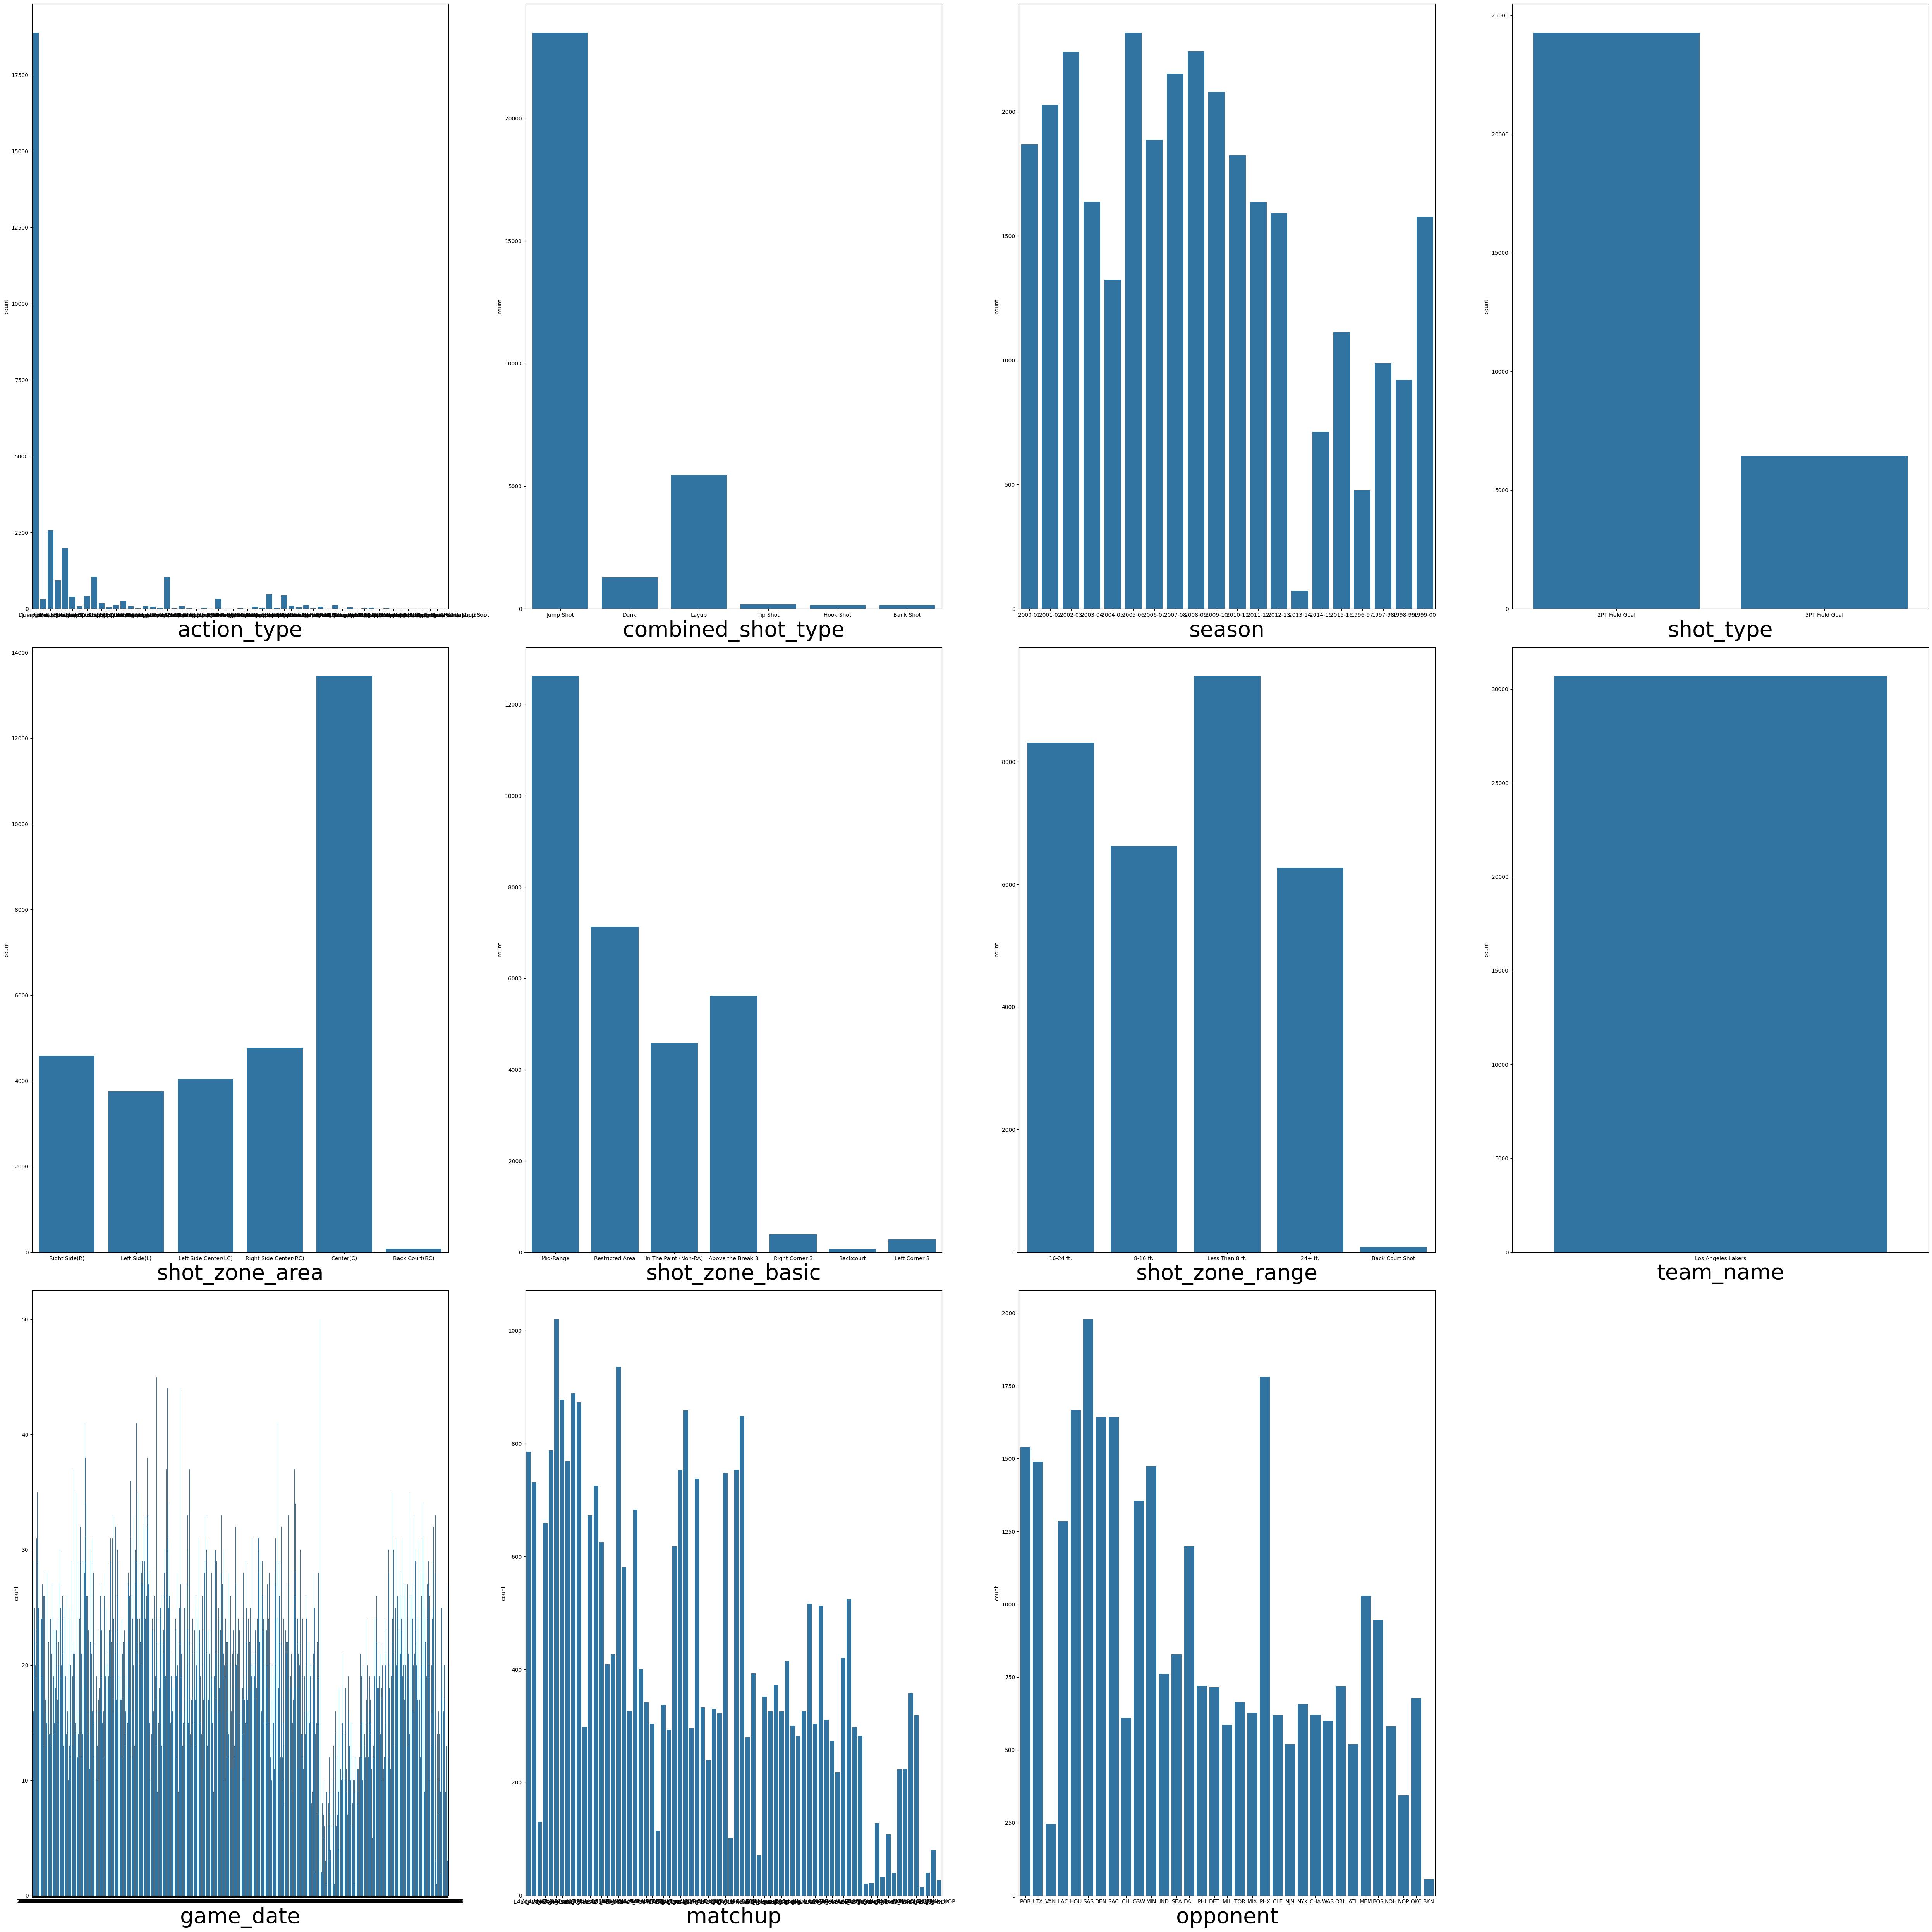

In [16]:
plt.figure(figsize=(50, 50), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in cat_columns:#for loop to acess columns form data1
    if plotnumber<=11 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(3, 4,plotnumber)#plotting 11 graphs in canvas(3 rows and 4 columns)
        sns.countplot(x=columns,data=cat_columns) #plotting count plot
        plt.xlabel(columns,fontsize=40)#assigning name to x-axis and increasing it's font
    plotnumber+=1#increasing counter
plt.tight_layout()

1) In action_type there are more than 18000 times player used jump shot.

2) Player used more than 20000 times jump shot along with combination of other shot.

3) In 2013-14 player made very less attempts for basket

4) Player made 2PT Field Goal majorly.

5) The majority attempts for basket made by the player from the center shot_zone_area.

6) The majority attempts for basket made by the player from the Mid-Range shot_zone_basic.

7) The majority attempts for basket made by the player less than 8ft.

8) Player played majority of games against SAS.

### BIVARIATE ANALYSIS

In [17]:
data.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [18]:
data=data.dropna()

In [19]:
data.shape

(25697, 25)

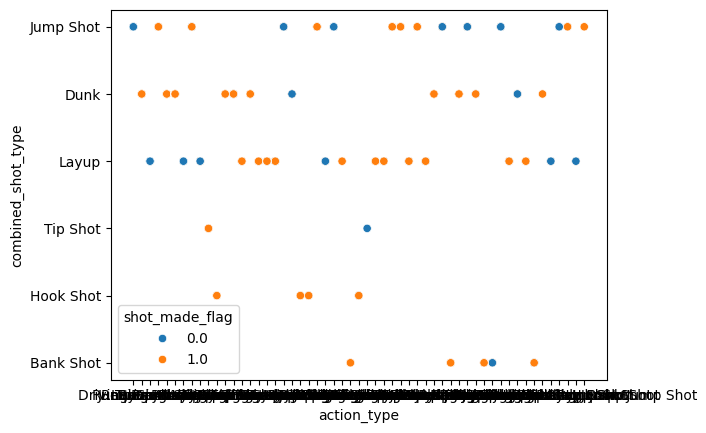

In [20]:
sns.scatterplot(x='action_type',y='combined_shot_type',hue='shot_made_flag',data=data)
plt.show()

1) If Hook shot is attempted then basket is made.

2) If Bank shot is attempted then their is a 80% of basket chance.

3) If Tip shot is attempted then their is a 50% chance of basket.

4) Majority Baskets are taken in Layup, Dunk and Jump shot.

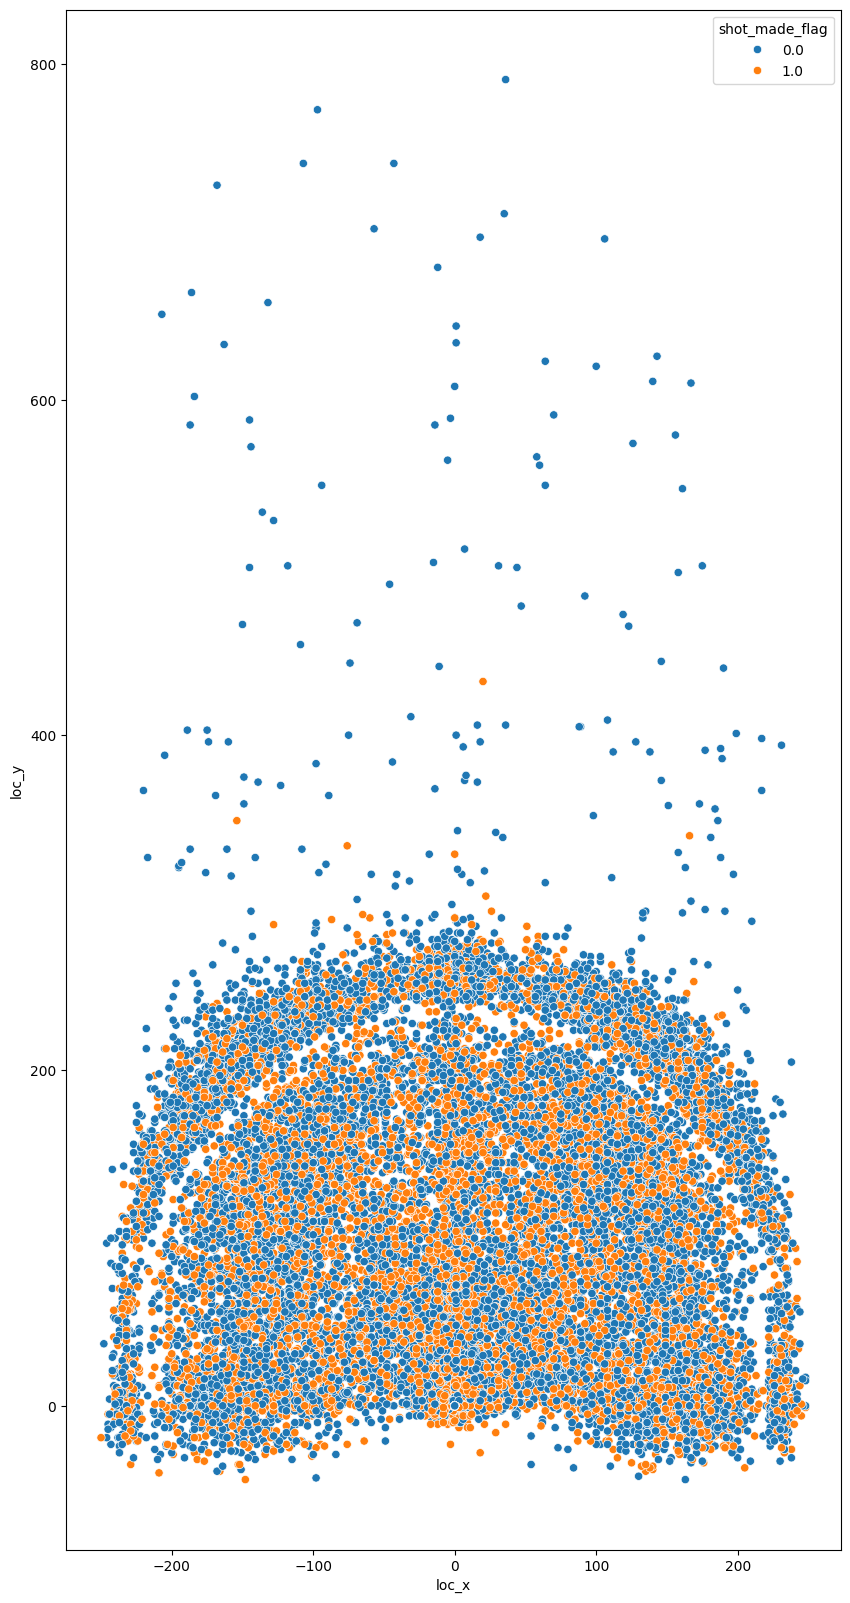

In [21]:
plt.figure(figsize=(10,20))
sns.scatterplot(x='loc_x',y='loc_y',hue='shot_made_flag',data=data)
plt.show()

<Axes: xlabel='lat', ylabel='lon'>

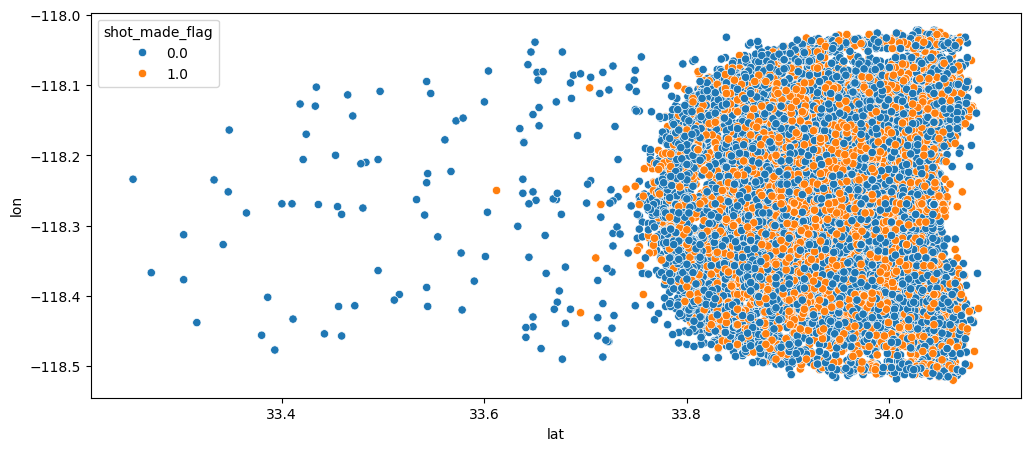

In [22]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='lat',y='lon',hue='shot_made_flag',data=data)

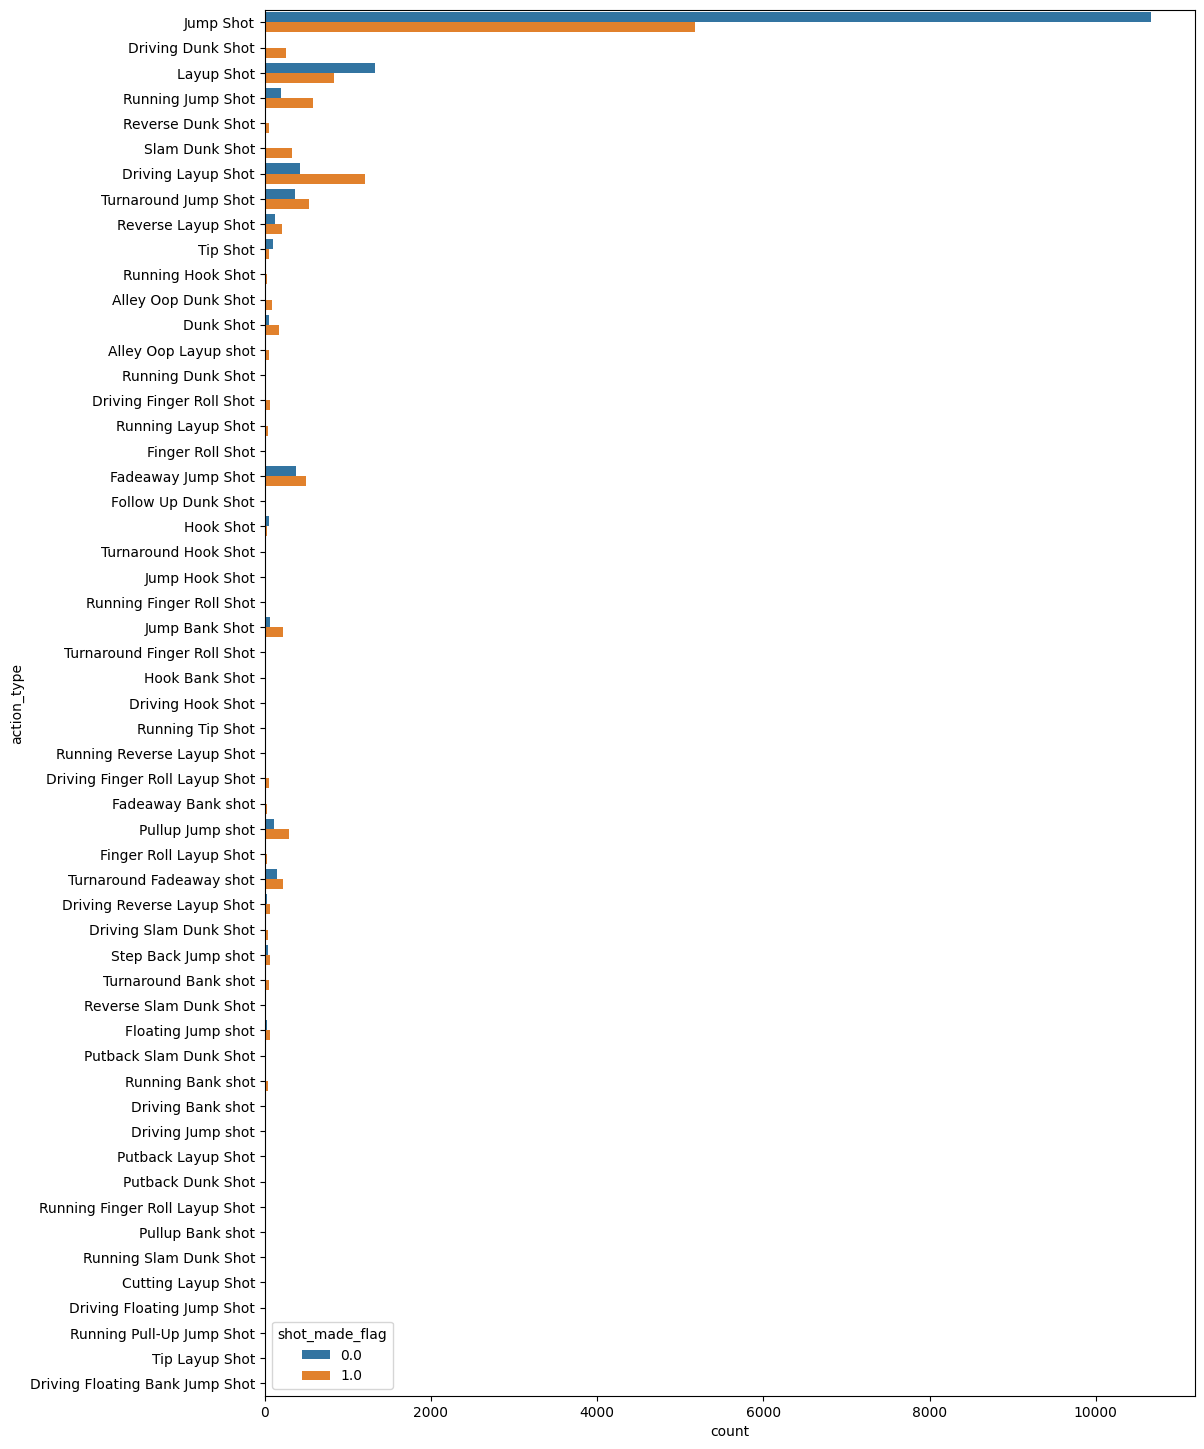

In [23]:
plt.figure(figsize=(12,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)
plt.show()

In [24]:
numerical_cols.columns

Index(['lat', 'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period',
       'playoffs', 'seconds_remaining', 'shot_distance'],
      dtype='object')

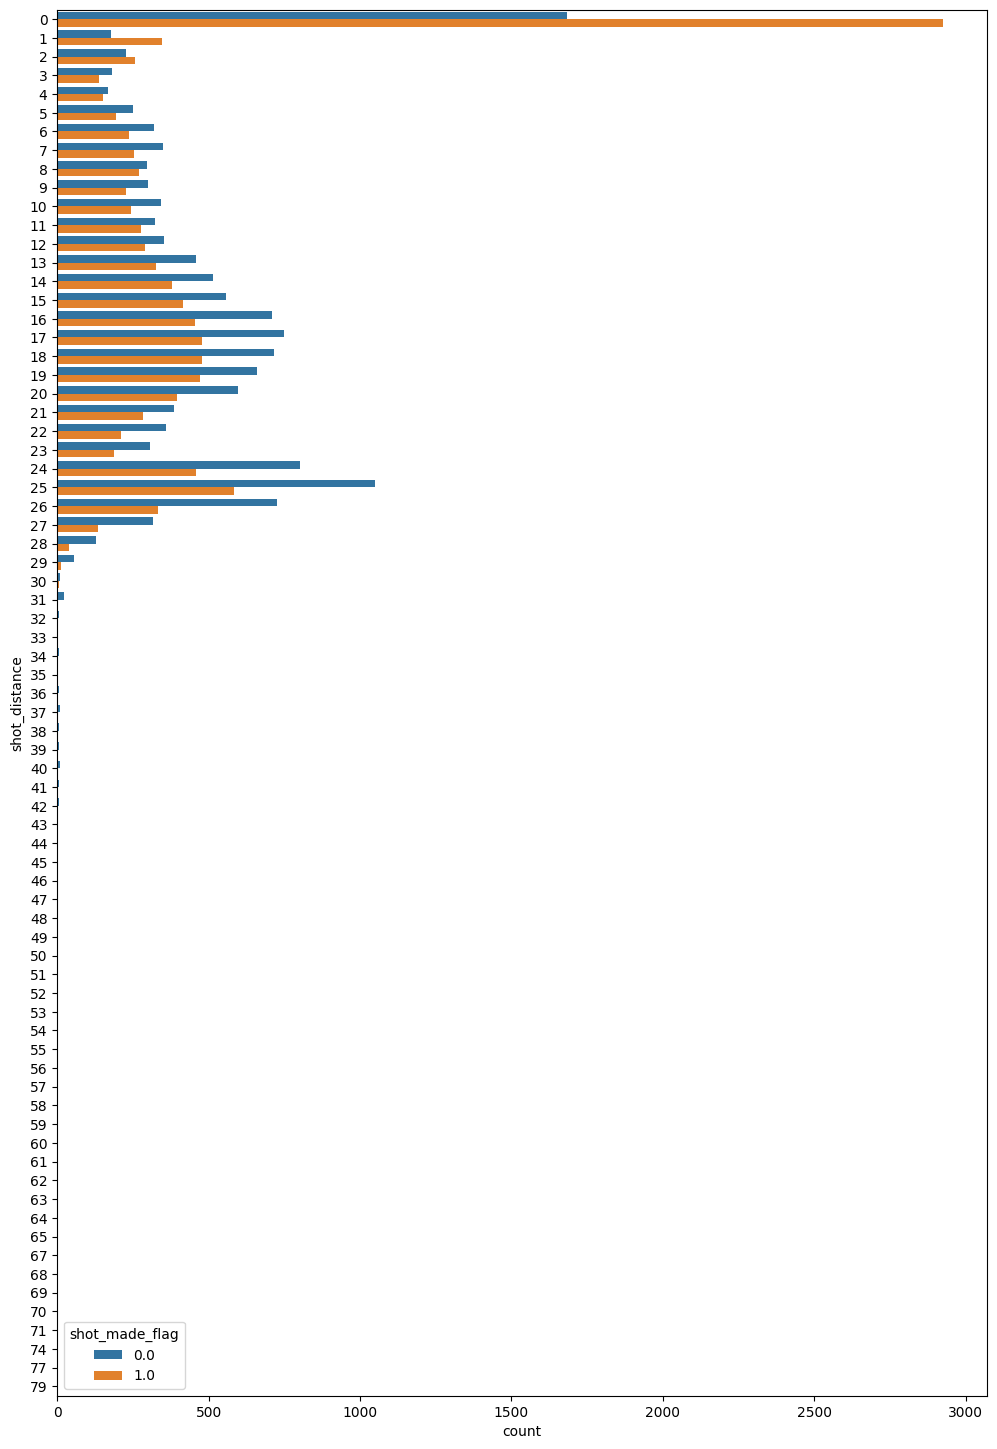

In [25]:
plt.figure(figsize=(12,18))
sns.countplot(hue="shot_made_flag",y="shot_distance", data=data)
plt.show()


#### If shot_distance is more than 30, then the player has made very less attempts. If shot_distance is less than 1, then maximum attempts were made. If shot_distance is 25,then second maximum attempts were made. Around 95% shots were made if shot_ditance is less than 30.

In [26]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

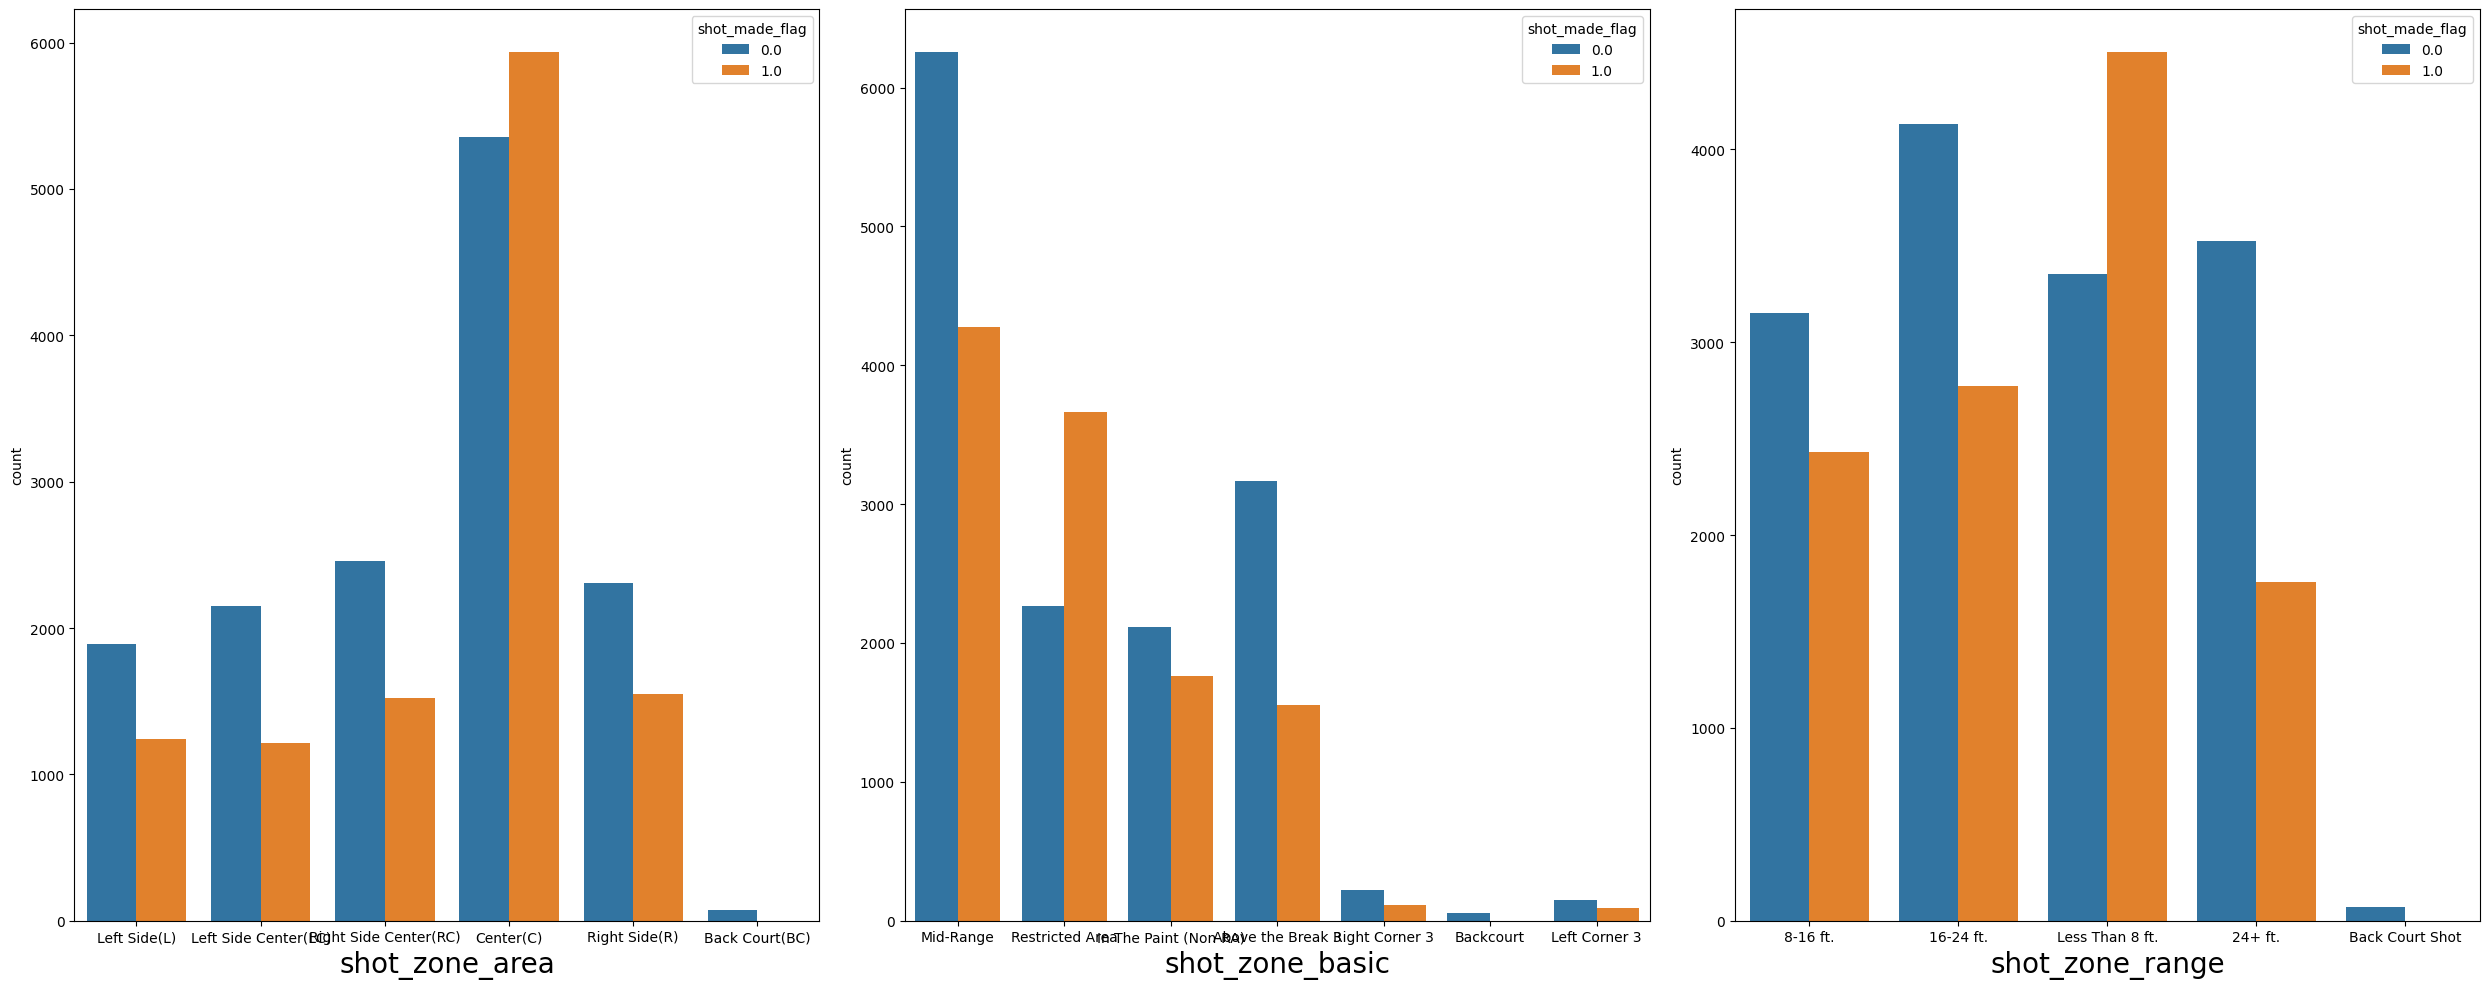

In [27]:
cat1_cols= data[['shot_zone_area', 'shot_zone_basic', 'shot_zone_range','shot_made_flag']]
plt.figure(figsize=(25, 10), facecolor='white')#canvas size
plotnumber = 1#count variable

for columns in cat1_cols:#for loop to acess columns form cat1_cols
    if plotnumber<=3 :#checking whether count variable is less than 11 or not
        ax = plt.subplot(1,3,plotnumber)#plotting 3 graphs in canvas(1 rows and 3 columns)
        sns.countplot(x=columns,data=cat1_cols,hue='shot_made_flag')
        plt.xlabel(columns,fontsize=20)#assigning name to x-axis and increasing it's font
        plotnumber+=1#increasing counter
plt.tight_layout()

# DATA PREPROCESSING AND FEATURE ENGINEERING

#### HANDLING MISSING VALUES

In [28]:
data.isnull().sum()

action_type           0
combined_shot_type    0
game_event_id         0
game_id               0
lat                   0
loc_x                 0
loc_y                 0
lon                   0
minutes_remaining     0
period                0
playoffs              0
season                0
seconds_remaining     0
shot_distance         0
shot_made_flag        0
shot_type             0
shot_zone_area        0
shot_zone_basic       0
shot_zone_range       0
team_id               0
team_name             0
game_date             0
matchup               0
opponent              0
shot_id               0
dtype: int64

In [29]:
df= data.drop(['game_event_id','game_id','lat','lon','team_id','shot_id','season','team_name','game_date','matchup'],axis=1)#,inplace=True)
df.head()

,action_type,combined_shot_type,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent
1,Jump Shot,Jump Shot,-157,0,10,1,0,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR
2,Jump Shot,Jump Shot,-101,135,7,1,0,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,POR
3,Jump Shot,Jump Shot,138,175,6,1,0,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,POR
4,Driving Dunk Shot,Dunk,0,0,6,2,0,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,POR
5,Jump Shot,Jump Shot,-145,-11,9,3,0,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,POR


# LABEL ENCODING

In [30]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.shot_type=lc.fit_transform(df.shot_type)
df.shot_zone_range=lc.fit_transform(df.shot_zone_range)

In [31]:
df=pd.get_dummies(data=df,drop_first=True)
df.head()

,loc_x,loc_y,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_range,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
1,-157,0,10,1,0,22,15,0.0,0,2,...,False,False,True,False,False,False,False,False,False,False
2,-101,135,7,1,0,45,16,1.0,0,0,...,False,False,True,False,False,False,False,False,False,False
3,138,175,6,1,0,52,22,0.0,0,0,...,False,False,True,False,False,False,False,False,False,False
4,0,0,6,2,0,19,0,1.0,0,4,...,False,False,True,False,False,False,False,False,False,False
5,-145,-11,9,3,0,32,14,0.0,0,2,...,False,False,True,False,False,False,False,False,False,False


In [33]:
df.shape

(25697, 112)

In [34]:
df.columns

Index(['loc_x', 'loc_y', 'minutes_remaining', 'period', 'playoffs',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_range',
       ...
       'opponent_PHI', 'opponent_PHX', 'opponent_POR', 'opponent_SAC',
       'opponent_SAS', 'opponent_SEA', 'opponent_TOR', 'opponent_UTA',
       'opponent_VAN', 'opponent_WAS'],
      dtype='object', length=112)

# MODEL CREATION

In [35]:
X=df.drop(['shot_made_flag'],axis=1)
y=df.shot_made_flag

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.2)

In [37]:
y.value_counts()

shot_made_flag
0.0    14232
1.0    11465
Name: count, dtype: int64

# LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score

In [40]:
y_pred1=model.predict(X_test)
y_pred1

array([0., 0., 0., ..., 0., 1., 0.])

In [41]:
accuracy_score(y_test,y_pred1)

0.6721789883268483

In [65]:
f1 = f1_score(y_test, y_pred1, average='weighted')
print("F1-score:", f1)

F1-score: 0.6635752342634907


In [66]:
cr=classification_report(y_test,y_pred1)
print(cr)

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73      2887
         1.0       0.67      0.50      0.57      2253

    accuracy                           0.67      5140
   macro avg       0.67      0.65      0.65      5140
weighted avg       0.67      0.67      0.66      5140



# RANDOM FOREST CLASSIFIER

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = model.predict(X_test)

In [45]:
y_pred2=model.predict(X_test)
y_pred2

array([0., 1., 0., ..., 0., 0., 0.])

In [46]:
accuracy_score(y_test,y_pred2)

0.6583657587548638

In [67]:
f1 = f1_score(y_test, y_pred2, average='weighted')
print("F1-score:", f1)

F1-score: 0.6492263393708018


In [47]:
cr=classification_report(y_test,y_pred2)
print(cr)

              precision    recall  f1-score   support

         0.0       0.66      0.79      0.72      2887
         1.0       0.65      0.49      0.55      2253

    accuracy                           0.66      5140
   macro avg       0.66      0.64      0.64      5140
weighted avg       0.66      0.66      0.65      5140



# Gradient Boosting Classifier (XGBoost)

In [50]:
import xgboost as xgb

In [51]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred3 = model.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.6645914396887159

In [68]:
f1 = f1_score(y_test, y_pred3, average='weighted')
print("F1-score:", f1)

F1-score: 0.6537776386265106


In [53]:
cr=classification_report(y_test,y_pred3)
print(cr)

              precision    recall  f1-score   support

         0.0       0.67      0.81      0.73      2887
         1.0       0.66      0.48      0.55      2253

    accuracy                           0.66      5140
   macro avg       0.66      0.64      0.64      5140
weighted avg       0.66      0.66      0.65      5140



# SUPPORT VECTOR MACHINE(SVM)

In [54]:
from sklearn.svm import SVC

In [55]:
model = SVC()
model.fit(X_train, y_train)
y_pred4 = model.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred4)

0.6134241245136187

In [69]:
f1 = f1_score(y_test, y_pred4, average='weighted')
print("F1-score:", f1)

F1-score: 0.5831006467650165


In [57]:
cr=classification_report(y_test,y_pred4)
print(cr)

              precision    recall  f1-score   support

         0.0       0.61      0.84      0.71      2887
         1.0       0.61      0.32      0.42      2253

    accuracy                           0.61      5140
   macro avg       0.61      0.58      0.57      5140
weighted avg       0.61      0.61      0.58      5140



In [58]:
final_data = pd.DataFrame({'Models': ['LR',  'RF', 'GBC', 'SVM'],
                           'ACC': [accuracy_score(y_test, y_pred1),
                                   accuracy_score(y_test, y_pred2),
                                   accuracy_score(y_test, y_pred3),
                                   accuracy_score(y_test, y_pred4)]})

In [59]:
final_data

,Models,ACC
0,LR,0.672179
1,RF,0.658366
2,GBC,0.664591
3,SVM,0.613424


<Axes: xlabel='Models', ylabel='ACC'>

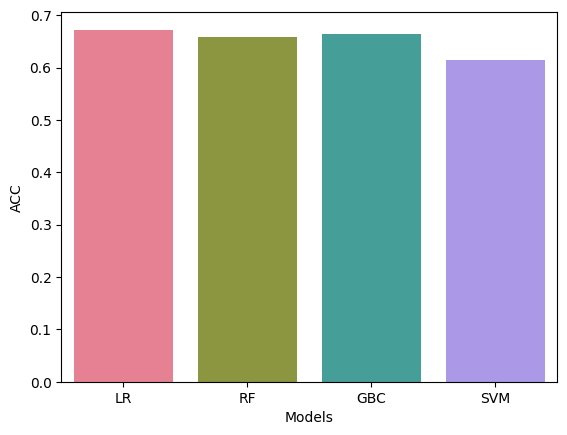

In [64]:
import seaborn as sns
custom_palette = sns.color_palette("husl", len(final_data['Models']))
sns.barplot(x=final_data['Models'], y=final_data['ACC'],palette=custom_palette)

# Model Comparison Report : 

## Logistic Regression:

                ##### Accuracy Score: 67%
                ##### F1 Score: 66%

## Support Vector Machine:

                ##### Accuracy Score: 61%
                ##### F1 Score: 58%

## Random Forest:

                ##### Accuracy Score: 65%
                ##### F1 Score: 64%
                
## Gradient Boosting:

                ##### Accuracy Score:66%
                ##### F1 Score: 65%
              
#### We conducted training and testing using four distinct models on the dataset, namely logistic regression, decision tree, random forest, and gradient boosting. Following evaluation, we computed their accuracy and F1 scores. Upon analysis, it was observed that the gradient boosting model outperformed the other models significantly in our scenario.